# Pynams: A Python Package for Nominally Anhydrous Minerals
Here are some examples for how to process FTIR spectra to estimate hydrogen contents and perform basic diffusion modeling with pynams.  


## Get pynams and basic python scientific and plotting packages
pynams should work with either python 2.7 or 3.

For those new to python, I recommend downloading [anaconda](https://www.continuum.io/downloads).If you are used to Matlab, check out [spyder](https://pythonhosted.org/spyder/), which comes with anaconda.To get the latest version of pynams off github, probably the easiest way is to 'clone' it using [GitHub Desktop](https://desktop.github.com/)

The plotting package is called matplotlib.  
This first line is just to make the plots show up correctly here.  
The second line will let us use some special plotting commands for fiddling with figures later on.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

## Create a Spectrum
pynams includes a class called Spectrum, which is how it knows what kinds of things an FTIR spectrum should have (wavenumbers, absorbances, thicknesses, associated samples, etc.) and what you might want to do with those things (make baselines, plot stuff). So let's import that.


In [9]:
from pynams import Spectrum

Each of your FTIR spectra will have to be created as an object, and Spectrum is the class, or template, for making these objects. Each Spectrum object then by default has attributes like thickness and the ability to create and save baselines. 

Each FTIR spectrum **requires** a short descriptive name (fname), and the location of the file containing the data (folder).

Ideally also give it information about the sample thickness **in microns** (thickness_microns),  Currently only .CSV and txt files are supported. The spectrum's fname should be the same as the filename without the extension. So if your spectrum is saved as pynamsDemo.CSV, the spectrum's fname should be the string 'pynamsDemo'.

Here in the first line I create a particular spectrum ("instantiate the class Spectrum" in object-oriented parlance), which I call spectrum, and I specify the fname and thickness while creating it.

This spectrum also needs to know where to find data from the file pynamsDemo.CSV. Here, for instance, we'll make a dummy spectrum called test, and it will complain because it can't find the file.

In [10]:
spectrum = Spectrum(fname = 'test')

There is a problem finding the file.
filename = test.CSV
Maybe check the folder name


Now, let's go get some data. I'll pull it off the web, but feel free to use your own.

Mac people: Maybe don't include the C: at the beginning of the folder name

In [11]:
# Here is the folder on my personal computer where I'm going to save the file.
FTIR_file_location = 'C:\\Users\\Ferriss\\Documents\\FTIR'

# Here I go get test data from the web and save it to the specified folder. If you have your own data don't bother with this.
import requests
r = requests.get('https://raw.githubusercontent.com/EFerriss/HydrogenCpx/master/FTIR_CSV_FILES/P_0_unpol.CSV')
workfile = ''.join((FTIR_file_location,'test.CSV'))
with open(workfile, 'w') as f:
    f.write(r.content)

# Now we can make the spectrum. 
spectrum = Spectrum(fname='test', folder=FTIR_file_location, thickness_microns=268.)

## Plotting spectra
You can look at the spectrum by calling the method plot_spectrum. This function returns handles for the figure and axis, which you can then save or adjust as with any other figure generated using matplotlib. To show another spectrum on the same axis, use the argument figaxis. You can also specify the style (my favorites are stored in pynams.styles) and set labels for making legends. 

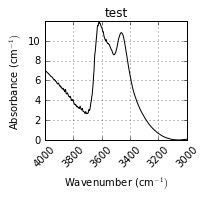

In [12]:
fig, ax = spectrum.plot_spectrum()

Next we'll plot two spectra on top of each other. 

You'll want those lines to look different. You can pass in a dictionary of style terms in through the keyword style (see example below). There are several premade style dictionaries in the pynams module styles, so we're going to import that too.

The keyword offset moves your spectrum up and down by the specified amount.

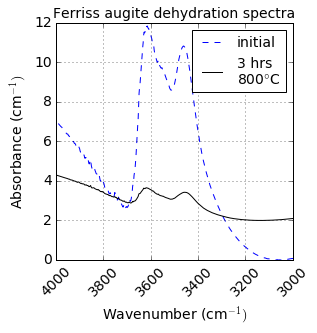

In [13]:
# Making second spectrum called spectrum2 the same way you did above
# get another test file
r = requests.get('https://raw.githubusercontent.com/EFerriss/HydrogenCpx/master/FTIR_CSV_FILES/P_6_unpol.CSV')
workfile = ''.join((FTIR_file_location, 'pynamsDemo2','.CSV'))
with open(workfile, 'w') as f:
    f.write(r.content)
# make the second spectrum    
spectrum2 = Spectrum(fname = 'pynamsDemo2', thickness_microns = 876.4, folder=FTIR_file_location)

# A larger plot with two spectra and a legend
from pynams import styles
fig, ax = spectrum.plot_spectrum(style=styles.style_initial, label='initial')
spectrum2.plot_spectrum(axes=ax, style=styles.style_1, label='3 hrs\n800$\degree$C', offset=2.)
fig.set_size_inches(5, 5)

# the y-axis limits should be set to whatever is appropriate for your spectra
ax.set_ylim(0, 12.)

ax.set_title('Ferriss augite dehydration spectra', fontsize=14)
hleg = ax.legend(loc=1, fontsize=14) 

# change font sizes
# this line is why we imported matplotlib.pyplot at the beginning
plt.tick_params(axis='both', which='major', labelsize=14) 

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

## Making baselines
The default is a line between wavenumbers 3200 and 3700 cm-1, but you can also make quadratic baselines (linetype='quadratic') or cubic splines (linetype='spline'; these can take awhile to run) and change the wavenumber range. Here are some examples:

First the default linear baseline.

(0, 15)

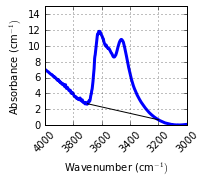

In [14]:
baseline = spectrum.make_baseline()
fig, ax = spectrum.plot_showbaseline()
ax.set_ylim(0, 15)

Next, a nice quadratic. 

Just specificying the linetype as quadratic will still give you a line. You need to also tell it how much to shift the curve away from being a line (the quadratic_shift). So it will fit a quadratic through the beginning and end wavenumbers and the point that is quadratic_shift away from the line at 3500. 

You can also set quadratic_wn, and it will force a fit through the curve at that wavenumber.

fitting x values: [ 3700.789  3550.     3199.379]
fitting y values: [ 2.69764925  0.08295389  0.65363806]


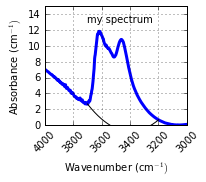

In [15]:
baseline = spectrum.make_baseline(linetype='quadratic', show_plot=False, quadratic_shift=2,
                                  show_fit_values=True)
fig, ax = spectrum.plot_showbaseline()
ax.set_ylim(0, 15)
ax.text(3700, 13, 'my spectrum')

## Subtracting the baseline

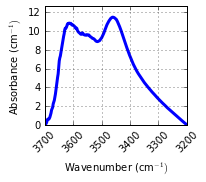

In [16]:
fig, ax = spectrum.plot_subtractbaseline()

# Profiles!

Overwriting previous areas list
5.00+/-0.20


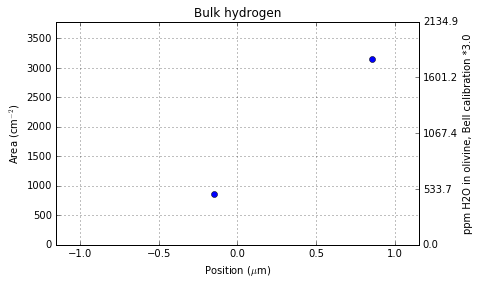

In [17]:
from pynams import Profile

profile = Profile(fnames=['pynamsDemo2', 'test'], folder=FTIR_file_location, thickness_microns=200., 
                  positions_microns=[1., 2.], length_microns=2.3)

for spec in profile.spectra:
    spec.make_baseline()
    spec.area_under_curve(show_plot=False, printout=False)

profile.make_area_list()
fig, ax = profile.plot_area_profile()

## Saving baselines
The method save_baseline() creates a new file fname-baseline.CSV containing the baseline and baseline-subtracted spectrum normalized per cm.

In [ ]:
spectrum.save_baseline(folder=FTIR_file_location)

## Retrieving saved baseline information

In [ ]:
# Get previously generated baseline information from the web
htmlname = 'https://raw.githubusercontent.com/EFerriss/HydrogenCpx/master/FTIR_CSV_FILES/baselines/P_0_unpol-baseline.CSV'
r = requests.get(htmlname)
workfile = ''.join((FTIR_file_location, spectrum.fname, '-baseline.CSV'))
with open(workfile, 'w') as f:
    f.write(r.content)

baseline_data = spectrum.get_baseline(folder=FTIR_file_location)
fig, ax = spectrum.plot_showbaseline()

## Estimating peak area and water concentration
Right now only the mineral-specific area calibrations from Bell et al. 1995 for clinopyroxene (phase_name='cpx') and Bell&Rossman 2003 or Withers et al. 2012 for olivine (phase_name='olivine', calibration='Bell' or 'Withers') are included, but other calibrations (Paterson, wavenumber-specific, other minerals) can be added either by me upon request, or, because the code is open source, by you, dear reader.

For this simple case, the water concentration returned is just the area between the curve and baseline multiplied by the integral specific absorption coefficient, and the error is propogated only from the error on that absorption coefficient. Ideally one would add up these areas from spectra polarized in three orthogonal directions (Libowitzky&Rossman, 1996). 

EXAMPLE COMING SOONISH.

## Peak fitting
I am unfortunately not aware of any good peak fitting programs currently available in python. The peak fitting program that I use is an open-source program available for Matlab and Octave called [peakfit.m](https://terpconnect.umd.edu/~toh/spectrum/InteractivePeakFitter.htm#command). Another option I am aware of is OpticalFit, which was developed by and is available from CSIRO Australia.

My strategy is as follows:  
1. Make and save the baseline using pynams as described above.
2. Perform a peak fitting routine on the baseline-subtracted spectrum in Matlab using peakfit.m, usually called through this [helper function](https://github.com/EFerriss/pynams/blob/master/matlab_helper_files/FTIR_peakfit_loop.m) that loops through spectra fnames and allows setting individual peak widths and heights.
3. At the end of FTIR_peakfit_loop.m call another matlab function to [save the fit](https://github.com/EFerriss/pynams/blob/master/matlab_helper_files/savefit.m) details as fname-peakfit.CSV
4. Back in python, retrieve the saved peakfit information using pynams.Spectrum.get_peakfit()


In [ ]:
# Get previously generated peakfit information file from the web
r = requests.get('https://raw.githubusercontent.com/EFerriss/HydrogenCpx/master/FTIR_CSV_FILES/peakfits/P_0_unpol-peakfit.CSV')
workfile = ''.join((FTIR_file_location, spectrum.fname, '-peakfit.CSV'))
with open(workfile, 'w') as f:
    f.write(r.content)

# SORRY NOT WORKING AT THE MOMENT. :(    
#spectrum.get_peakfit()    
#fig, ax = spectrum.plot_peakfit()
#fig.set_size_inches(5, 5)

# To get the curve information details, use 
#peakfitcurves, summed_spectrum = spectrum.get_peakfit()


# Diffusion modeling
## 1-dimensional diffusion

In [ ]:
# Also not working...
#from pynams import diffusion

log10D_m2s = -12.
length_microns = 100.
time_minutes = 1000.


#fig, ax, x, y = diffusion.diffusion1D(length_microns, log10D_m2s, time_seconds=time_minutes/60., init=1., fin=0.)

## 3-dimensional, non-path-integrated (3Dnpi) in a rectangular parallelepiped
coming soon!
v is the the 3-dimensional matrix of concentrations in the parallelepiped